# 신경망의 수학적 구성 요소

## 신경망과의 첫 만남
딥러닝 모델 구현 방법:
1. 모델 정의
 - Sequential, Model(inputs, outputs) 함수형, MyModel() 서브 클래싱
 - 연산을 정의하는 layer를 추가
2. 모델 컴파일
 - loss 정의
 - w 업데이트 방법
 - 평가 척도를 지정
3. fit 메소드를 이용하여 학습
4. 평가 / 예측
 - evaluate(X_test, y_test)
 - predict(X_test)

**케라스에서 MNIST 데이터셋 적재하기**

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
import numpy as np
np.unique(train_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
np.unique(test_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

**신경망 구조**
$$\begin{align}
h_1 &= \text{ReLU}(X \cdot w_1 + b_1) \\
(b, 512) &= (b, 28*28) \cdot (28*28, 512) + (512,) \\
\hat y = P(y=c) &= \text{Softmax}(h_1 \cdot w_2 + b_2) \\
(b, 10) &= (b, 512) \cdot (512, 10) + (10,)
\end{align}$$

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(512, activation="relu", input_dim=28*28))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Dense 레이어에서 w의 shape = (input_size, output_size), b의 shape = (output_size, )
print(f"첫번째 파라미터의 수 = {28*28 * 512 + 512}")
print(f"첫번째 파라미터의 수 = {512 * 10 + 10}")

첫번째 파라미터의 수 = 401920
첫번째 파라미터의 수 = 5130


h = Relu(X.w + b):
- 타겟에 영향을 미치는 정보를 가져와서 어떤 threshold 값 이하면 버려
- 타겟을 예측하는 데 긍정적인 정보는 그대로 가져오고 그렇지 않은것은 버려

In [ ]:
relu = lambda x: np.maximum(0, x)
x = np.array([-.1, 5, 2.7])
relu(x)

array([0. , 5. , 2.7])

**컴파일 단계**
모델이 학습가능한 상태로 만드는 작업:
1. optimizer를 지정: 학습파라미터 업데이트 방법. 학습율도 지정
2. 손실함수를 정의:
    - 분류모델: 이진모델(binary_crossentropy), 멀티클래스(categorical_crossentropy)
    - y의 형식에 따라: y가 one-hoted이면 그냥, y가 not one-hoted이면 sparse_ 라는 prefix를 사용
3. 평가방법; 모델이 얼마나 좋은지를 평가하기 위한 척도를 지정
    - 분류모델: 'acc', 'auc', 'f1', ...
    - 회귀모델: 'r2', 'mae', 'mse', ....

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

#### optimizer
- SGD(Stochastice Gradient Descent) : w(t+1) = w(t) - a * Loss'(w(t))
- 모멘텀 기법을 이용
 - 현재 배치에서 바라본 가장 빠른 방향(dW)을 따르는 것이 아니라
 - 선배들의 방향의 합을 90% 취하고 내가 바로본 방향(dW(w=w(t))은 10% 취하여 w를 이동하는 방법
 - nesterov : 선배들의 방향을 먼저 따르고 나서 내 방향을 계산하는 방법
 - rmsprop : w의 이동거리(업데이트 크기)를 일정하게 유지하는 방법
 - adam : nesterov + rmsprop 결합한 업데이트 방법

**이미지 데이터 준비하기**

이미지 전처리:
1. 이미지를 벡터화 : dense 레이어는 행렬을 벡터로 연결하지 못한다.
2. 이미지를 스케일링 : MinMaxScaling.

In [ ]:
np.unique(train_images[0], return_counts=True)

(array([  0,   1,   2,   3,   9,  11,  14,  16,  18,  23,  24,  25,  26,
         27,  30,  35,  36,  39,  43,  45,  46,  49,  55,  56,  64,  66,
         70,  78,  80,  81,  82,  90,  93,  94, 107, 108, 114, 119, 126,
        127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166,
        170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205,
        207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244,
        247, 249, 250, 251, 252, 253, 255], dtype=uint8),
 array([618,   2,   3,   1,   1,   3,   1,   2,   5,   1,   1,   1,   1,
          1,   1,   1,   1,   2,   1,   1,   1,   1,   1,   1,   2,   1,
          1,   1,   2,   2,   2,   1,   2,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   2,   1,   1,   1,   3,   1,   1,   1,
          1,   1,   2,   1,   2,   1,   1,   1,   2,   2,   2,   1,   1,
          1,   1,   1,   2,   1,   2,   1,   1,   1,   1,   2,   1,   1,
          2,   2,   1,   1,   1,  54,   1]))

#### 스케일링
데이터의 값을 일정한 범위로 변경시키는 방법
1. MinMaxScaling : 최대값을 1, 최소값을 0으로 변환
 $$x ⇒ \cfrac {x - x.min()}{x.max() - x.min()}$$
2. StandardScaling : 평균을 0, 표준편차를 1로 변환
 $$x ⇒ \cfrac {x - \mu(x)}{\sigma(x)}$$
3. RobustScaling : 이상치가 많을 때, 많이 활용됨

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**모델 훈련**

In [ ]:
np.ceil(train_images.shape[0] / 128)

469.0

In [ ]:
hist = model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 8s 5ms/step - loss: 0.2677 - accuracy: 0.9217
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1080 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0705 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0506 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0379 - accuracy: 0.9890


**모델을 사용해 예측 만들기**

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 86ms/step


array([1.4196068e-08, 8.5711366e-10, 8.0987311e-06, 1.3500621e-05,
       1.4693975e-10, 2.8257361e-08, 4.2832144e-13, 9.9997175e-01,
       4.0919593e-07, 6.2706586e-06], dtype=float32)

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.99997175

In [ ]:
test_labels[0]

7

**새로운 데이터에서 모델 평가하기**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0694 - accuracy: 0.9789
테스트 정확도: 0.9789000153541565


In [ ]:
hist.history

{'loss': [0.2676553726196289,
  0.10799162089824677,
  0.07049418985843658,
  0.05057745799422264,
  0.037859223783016205],
 'accuracy': [0.9216833114624023,
  0.9686833620071411,
  0.9789333343505859,
  0.9850666522979736,
  0.9890333414077759]}

In [ ]:
import pandas as pd
pd.DataFrame(hist.history)

,loss,accuracy
0,0.267655,0.921683
1,0.107992,0.968683
2,0.070494,0.978933
3,0.050577,0.985067
4,0.037859,0.989033


<Axes: >

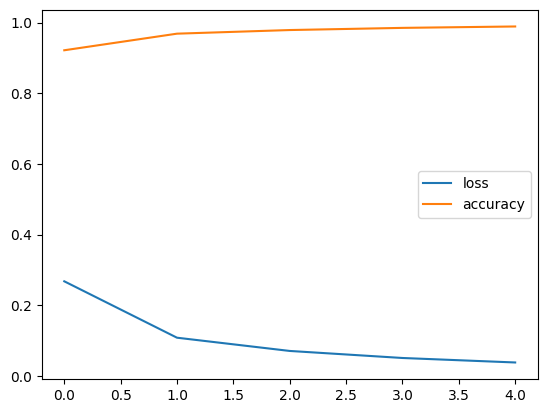

In [ ]:
import pandas as pd
pd.DataFrame(hist.history).plot()

In [ ]:
# 아래 코드는 약 15분 정도 걸립니다.
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(1000, max_depth=8, n_jobs=-1)
# clf.fit(train_images, train_labels)
# clf.score(test_images, test_labels) # 0.9318

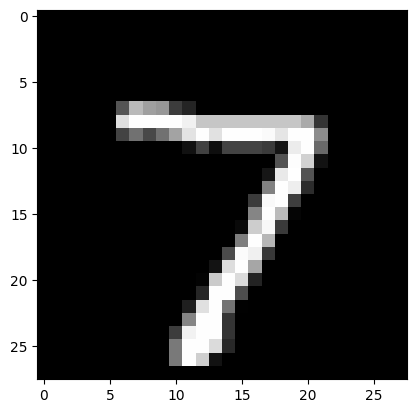

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_images[0].reshape((28,28)), cmap='gray')

## 신경망을 위한 데이터 표현

### 스칼라 (랭크-0 텐서)

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

In [ ]:
np.array([12])

array([12])

In [ ]:
np.array([12]).ndim

1

### 벡터 (랭크-1 텐서)

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

### 행렬 (랭크-2 텐서)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### 랭크-3 텐서와 더 높은 랭크의 텐서

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### 핵심 속성

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.ndim

3

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.dtype

dtype('uint8')

**다섯 번째 이미지 출력하기**

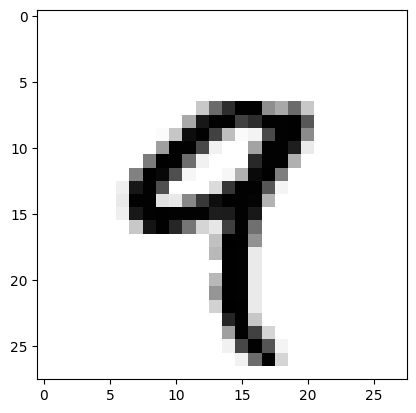

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

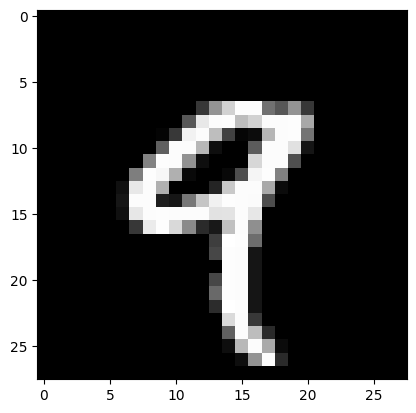

In [ ]:
plt.imshow(digit, cmap=plt.cm.gray)
plt.show()

In [ ]:
train_labels[4]

9

### 넘파이로 텐서 조작하기

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:]

In [ ]:
my_slice = train_images[:, 7:-7, 7:-7]

### 배치 데이터

In [ ]:
batch = train_images[:128]

In [ ]:
batch = train_images[128:256]

In [ ]:
# batch_size * batch_idx : batch_size * (batch_idx + 1)
n = 3
batch = train_images[128 * n:128 * (n + 1)]

In [ ]:
# 실제로는 아래와 같은 섞은 데이터를 batch로 가져온다.
idx = np.arange(train_images.shape[0])
np.random.shuffle(idx)
batch_idx = idx[128 * n:128 * (n + 1)]
batch = train_images[batch_idx]

### 텐서의 실제 사례
- 표형식의 데이터: 2차원 (n, p)
- 자연어 문장들:
 - raw 데이터 형식: ["........", "......"] (n, ) 1차원
 - 정수화, 문장 길이 제한:(n, p)
- 3차원 데이터: (n, p, q)
 - 흑백 이미지들: (n, h, w)
 - one-hoted 정수화 문장들: (n, max_length, n_vocab)
- 4차원 데이터: (n, p, q, r)
 - 컬러 이미지들: (n, h, w, c)

### 벡터 데이터
표형식의 데이터, 1개의 데이터가 벡터로 표현되는 데이터

### 시계열 데이터 또는 시퀀스 데이터
- 시계열 데이터: 역전 불가능
    - 소리
    - 동영상
    - 날씨
    - 주가
    - 전력소모량
- 시퀀스 데이터: 역전 가능(시계열 제외)
    - 시계열 데이터
    - 자연어


### 이미지 데이터

### 비디오 데이터

## 신경망의 톱니바퀴: 텐서 연산

### 원소별 연산

일반 연산과 numpy 연산의 속도 비교

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
relu = lambda x : np.maximum(x, 0)

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [ ]:
add = lambda x, y: x+y

In [ ]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 0.01 s


In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 3.27 s


### 브로드캐스팅

In [ ]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [ ]:
y = np.expand_dims(y, axis=0)
y.shape

(1, 10)

In [ ]:
Y = np.concatenate([y] * 32, axis=0)
Y.shape

(32, 10)

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)
z.shape

(64, 3, 32, 10)

### 텐서 곱셈

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)
z

9.480839991894552

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### 텐서 크기 변환

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [ ]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

In [ ]:
x = np.arange(3*4*5).reshape((3,4,5))
x

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39]],

       [[40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59]]])

In [ ]:
# t = x.T : x[i,j,k] = t[k,j,i]
x.T

array([[[ 0, 20, 40],
        [ 5, 25, 45],
        [10, 30, 50],
        [15, 35, 55]],

       [[ 1, 21, 41],
        [ 6, 26, 46],
        [11, 31, 51],
        [16, 36, 56]],

       [[ 2, 22, 42],
        [ 7, 27, 47],
        [12, 32, 52],
        [17, 37, 57]],

       [[ 3, 23, 43],
        [ 8, 28, 48],
        [13, 33, 53],
        [18, 38, 58]],

       [[ 4, 24, 44],
        [ 9, 29, 49],
        [14, 34, 54],
        [19, 39, 59]]])

In [ ]:
np.swapaxes(x, 0, 2)

array([[[ 0, 20, 40],
        [ 5, 25, 45],
        [10, 30, 50],
        [15, 35, 55]],

       [[ 1, 21, 41],
        [ 6, 26, 46],
        [11, 31, 51],
        [16, 36, 56]],

       [[ 2, 22, 42],
        [ 7, 27, 47],
        [12, 32, 52],
        [17, 37, 57]],

       [[ 3, 23, 43],
        [ 8, 28, 48],
        [13, 33, 53],
        [18, 38, 58]],

       [[ 4, 24, 44],
        [ 9, 29, 49],
        [14, 34, 54],
        [19, 39, 59]]])

In [ ]:
np.transpose(x, (2,1,0))

array([[[ 0, 20, 40],
        [ 5, 25, 45],
        [10, 30, 50],
        [15, 35, 55]],

       [[ 1, 21, 41],
        [ 6, 26, 46],
        [11, 31, 51],
        [16, 36, 56]],

       [[ 2, 22, 42],
        [ 7, 27, 47],
        [12, 32, 52],
        [17, 37, 57]],

       [[ 3, 23, 43],
        [ 8, 28, 48],
        [13, 33, 53],
        [18, 38, 58]],

       [[ 4, 24, 44],
        [ 9, 29, 49],
        [14, 34, 54],
        [19, 39, 59]]])

### 텐서 연산의 기하학적 해석

### 딥러닝의 기하학적 해석

## 신경망의 엔진: 그레이디언트 기반 최적화

### 도함수란?

### 텐서 연산의 도함수: 그레이디언트

### 확률적 경사 하강법
$$w(t+1) = w(t) - \text{limit}_{\Delta w → 0} \cfrac {\Delta Loss(w)}{\Delta w} (w = w(t))$$

### 도함수 연결: 역전파 알고리즘
- https://www.youtube.com/watch?v=1Q_etC_GHHk

#### 연쇄 법칙

#### 계산 그래프를 활용한 자동 미분

#### 텐서플로의 그레이디언트 테이프

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [ ]:
x = tf.Variable(tf.zeros((3,3)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]], dtype=float32)>

데이터 방향의 미분 성분을 모두 더하여 합벡터 성분을 생성한다.

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
x, grad_of_y_wrt_W_and_b

(<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.838619  , 0.49860013],
        [0.39538264, 0.31781018]], dtype=float32)>,
 [<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
  array([[1.2340016, 1.2340016],
         [0.8164103, 0.8164103]], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>])

In [ ]:
dW, db = grad_of_y_wrt_W_and_b

In [ ]:
dW.numpy(), np.array([x[:,0].numpy().sum(), x[:, 1].numpy().sum()])

(array([[1.2340016, 1.2340016],
        [0.8164103, 0.8164103]], dtype=float32),
 array([1.2340016, 0.8164103], dtype=float32))

## 첫 번째 예제 다시 살펴보기

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2651 - accuracy: 0.9241
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1077 - accuracy: 0.9675
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0711 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0514 - accuracy: 0.9841
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0383 - accuracy: 0.9886


### 텐서플로를 사용해 첫 번째 예제를 밑바닥부터 다시 구현하기

#### 단순한 Dense 클래스

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    # __call__ 메소드는 클래스의 인스턴스가 함수처럼 동작하게 하는 메소드
    # - d = NaiveDense(28*28, 512, 'relu')
    # - relu(X_train.dot(W) + b) = d(X_train) = d.__call__(X_train)
    # - feedforward를 구현하는 함수이어서, x입력을 받아 yhat을 리턴
    def __call__(self, inputs):
    # def call(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    # property 데코레이터는 함수를 멤버변수처럼 사용하게 해준다.
    # - d.weights() = d.weights
    @property
    def weights(self):
        return [self.W, self.b]

In [ ]:
d = NaiveDense(784, 512, tf.nn.relu)

#### 단순한 Sequential 클래스

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    # 모델의 입력을 받아 yhat을 출력하는 함수로 feed forward를 수행한다고 한다.
    def __call__(self, inputs):
        h = inputs
        for layer in self.layers:
            h = layer(h)
        yhat = h
        return yhat

    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### 배치 제너레이터
generator : 반복적으로 값을 출력할 수 있는 규칙을 갖고 있는 객체

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

In [ ]:
g = BatchGenerator(train_images, train_labels)

### 훈련 스텝 실행하기

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)

        # axis의 값이 기본 None이고, 이때 모든 axis에 대한 평균을 구하여 scalar가 된다.
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

# SGD 구현
def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        # w -= lr*dw
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### 전체 훈련 루프

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"에포크 {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"{batch_counter}번째 배치 손실: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

에포크 0
0번째 배치 손실: 7.55
100번째 배치 손실: 2.23
200번째 배치 손실: 2.21
300번째 배치 손실: 2.09
400번째 배치 손실: 2.22
에포크 1
0번째 배치 손실: 1.91
100번째 배치 손실: 1.87
200번째 배치 손실: 1.82
300번째 배치 손실: 1.73
400번째 배치 손실: 1.83
에포크 2
0번째 배치 손실: 1.59
100번째 배치 손실: 1.56
200번째 배치 손실: 1.49
300번째 배치 손실: 1.43
400번째 배치 손실: 1.50
에포크 3
0번째 배치 손실: 1.33
100번째 배치 손실: 1.32
200번째 배치 손실: 1.23
300번째 배치 손실: 1.21
400번째 배치 손실: 1.27
에포크 4
0번째 배치 손실: 1.13
100번째 배치 손실: 1.14
200번째 배치 손실: 1.03
300번째 배치 손실: 1.05
400번째 배치 손실: 1.10
에포크 5
0번째 배치 손실: 0.98
100번째 배치 손실: 1.01
200번째 배치 손실: 0.89
300번째 배치 손실: 0.93
400번째 배치 손실: 0.98
에포크 6
0번째 배치 손실: 0.87
100번째 배치 손실: 0.90
200번째 배치 손실: 0.79
300번째 배치 손실: 0.84
400번째 배치 손실: 0.89
에포크 7
0번째 배치 손실: 0.79
100번째 배치 손실: 0.82
200번째 배치 손실: 0.71
300번째 배치 손실: 0.77
400번째 배치 손실: 0.83
에포크 8
0번째 배치 손실: 0.73
100번째 배치 손실: 0.75
200번째 배치 손실: 0.65
300번째 배치 손실: 0.71
400번째 배치 손실: 0.78
에포크 9
0번째 배치 손실: 0.68
100번째 배치 손실: 0.70
200번째 배치 손실: 0.60
300번째 배치 손실: 0.67
400번째 배치 손실: 0.74


### 모델 평가하기

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"정확도: {matches.mean():.2f}")

정확도: 0.82


## 성능 향상
1. generator에서 데이터를 shuffle하여 batch를 생성할 수 있도록 한다.
2. 러닝 레이트를 좀 줄이고
3. SGD가 아닌 RMSProp, adamW 것들로 대체하여 사용해보세요.
 - adam은 momentum + RMSProp
 - Nadam은 Nesterov + RMSProp
 - adamW는 adam + L2 loss

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### 배치 제너레이터

In [ ]:
import math

# 매 인스턴스를 생성할 때 마다 random index를 생성하고
class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)
        randidx = np.arange(len(images))
        np.random.shuffle(randidx)
        self.randidx = randidx

    # 호출할 때 마다 random index에 batch개의 색인을 추출하여 이를 통해 batch 데이터를 리턴
    def next(self):
        batchidx = self.randidx[self.index : self.index + self.batch_size]
        images = self.images[batchidx]
        labels = self.labels[batchidx]
        self.index += self.batch_size
        return images, labels

### 훈련 스텝 실행하기

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        # axis의 값이 기본 None이고, 이때 모든 axis에 대한 평균을 구하여 scalar가 된다.
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
from tensorflow.keras import optimizers

learning_rate = 1e-3

# nestrov 구현
# optimizer = optimizers.SGD(learning_rate=1e-3, momentum=.95, nesterov=True)
# adamw 사용
optimizer = optimizers.AdamW()

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### 전체 훈련 루프

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"에포크 {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"{batch_counter}번째 배치 손실: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

에포크 0


0번째 배치 손실: 5.21
100번째 배치 손실: 0.50
200번째 배치 손실: 0.57
300번째 배치 손실: 0.27
400번째 배치 손실: 0.27
에포크 1
0번째 배치 손실: 0.45
100번째 배치 손실: 0.43
200번째 배치 손실: 0.26
300번째 배치 손실: 0.31
400번째 배치 손실: 0.35
에포크 2
0번째 배치 손실: 0.41
100번째 배치 손실: 0.22
200번째 배치 손실: 0.31
300번째 배치 손실: 0.30
400번째 배치 손실: 0.27
에포크 3
0번째 배치 손실: 0.41
100번째 배치 손실: 0.24
200번째 배치 손실: 0.35
300번째 배치 손실: 0.15
400번째 배치 손실: 0.23
에포크 4
0번째 배치 손실: 0.53
100번째 배치 손실: 0.29
200번째 배치 손실: 0.41
300번째 배치 손실: 0.29
400번째 배치 손실: 0.53
에포크 5
0번째 배치 손실: 0.20
100번째 배치 손실: 0.24
200번째 배치 손실: 0.34
300번째 배치 손실: 0.32
400번째 배치 손실: 0.27
에포크 6
0번째 배치 손실: 0.24
100번째 배치 손실: 0.22
200번째 배치 손실: 0.28
300번째 배치 손실: 0.21
400번째 배치 손실: 0.39
에포크 7
0번째 배치 손실: 0.20
100번째 배치 손실: 0.17
200번째 배치 손실: 0.19
300번째 배치 손실: 0.26
400번째 배치 손실: 0.16
에포크 8
0번째 배치 손실: 0.23
100번째 배치 손실: 0.08
200번째 배치 손실: 0.19
300번째 배치 손실: 0.15
400번째 배치 손실: 0.30
에포크 9
0번째 배치 손실: 0.11
100번째 배치 손실: 0.10
200번째 배치 손실: 0.03
300번째 배치 손실: 0.13
400번째 배치 손실: 0.09


### 모델 평가하기

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"정확도: {matches.mean():.2f}")

정확도: 0.96


train에서의 정확도

In [ ]:
predictions = model(train_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == train_labels
print(f"정확도: {matches.mean():.2f}")

정확도: 0.97


## 모멘텀 요약

[Optimizer 의 종류와 특성](https://onevision.tistory.com/entry/Optimizer-%EC%9D%98-%EC%A2%85%EB%A5%98%EC%99%80-%ED%8A%B9%EC%84%B1-Momentum-RMSProp-Adam)을 읽어보세요.
![](https://t1.daumcdn.net/cfile/tistory/9906BE3D5A3A642E06)

adamW의 API :
- [AMSgrad](https://velog.io/@aacara/On-the-convergence-of-ADAM-andBEYOND) 옵션 : 수렴을 위한 장기기억의 보존 및 점차 작아지는 step size
- [pytorch](https://pytorch.org/docs/stable/generated/torch.optim.AdamW.html) : 좀 더 유연한 설정이 가능하도록 구현됨
- [tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/AdamW) : 파라미터에 대한 더 상세한 설명 제공